## Data

In [1]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)


import numpy as np
import pandas as pd

# add some random features to the original data to better illustrate the feature selection performed by the Lasso model.
rng = np.random.RandomState(42)
num_random_features = 14
#  floating-point samples from the standard normal distribution
X_random = pd.DataFrame(data=rng.randn(X.shape[0], num_random_features),
                        columns=[f'random-{i}' for i in range(num_random_features)])
# X_random.shape --> (442, 14)
X = pd.concat([X, X_random], axis=1)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,random-4,random-5,random-6,random-7,random-8,random-9,random-10,random-11,random-12,random-13
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,-0.460639,1.057122,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120


## Lasso model selection using Cross validation


The Lasso estimator can be implemented with different solvers: coordinate descent and least angle regression. 

In scikit-learn, two different estimators are available with integrated cross-validation

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### lassoCV

In [36]:
def build_pipeline(model):
    return make_pipeline(StandardScaler(), model)

In [37]:
model = LassoCV(cv=20)

pipe = build_pipeline(model)
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=20))])

### Make a plot with log scaling on the x axis

`mse_path_` ndarray of shape (n_alphas, n_folds)

Mean square error for the test set on each fold, varying alpha.

`alphas_` ndarray of shape (n_alphas,)

The grid of alphas used for fitting.

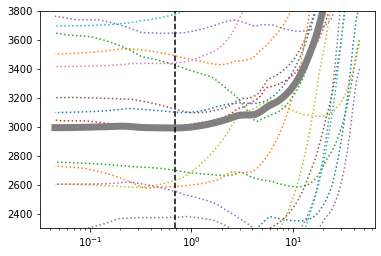

In [38]:
plt.semilogx(pipe[-1].alphas_, pipe[-1].mse_path_, linestyle=':');
plt.semilogx(pipe[-1].alphas_, pipe[-1].mse_path_.mean(axis=1), color='gray', linewidth=7.0);
plt.axvline(pipe[-1].alpha_, linestyle="--", color="black", label="alpha: CV estimate");
ymin, ymax = 2300, 3800
plt.ylim(ymin, ymax);

### LassoLarsCV

In [39]:
model = LassoLarsCV(cv=20, normalize=False)

pipe = build_pipeline(model)
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarscv', LassoLarsCV(cv=20, normalize=False))])

In [32]:
### PLOTS

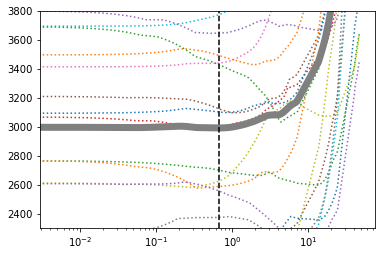

In [43]:
plt.semilogx(pipe[-1].cv_alphas_, pipe[-1].mse_path_, linestyle=':');
plt.semilogx(pipe[-1].cv_alphas_, pipe[-1].mse_path_.mean(axis=1), color='gray', linewidth=7.0);
plt.axvline(pipe[-1].alpha_, linestyle="--", color="black", label="alpha: CV estimate");
ymin, ymax = 2300, 3800
plt.ylim(ymin, ymax);